In [1]:
# !pip install pandas matplotlib

In [2]:
import pandas as pd
import os

Read each txt file in the specified directory

In [3]:
directory = 'object_counting_data'
files = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.txt')]

In [4]:
read_f = []
for file in files:
    hold = pd.read_csv(file, header=None)
    hold.columns = ['Time', 'x-axis', 'y-axis','Class']
    read_f +=[hold]

objects = pd.concat(read_f)

Tidying up

In [5]:
classes = { 0 : 'Bicyclist', 1: 'Pedestrian'}

In [6]:
# Parse time field
objects['Time'] =  pd.to_datetime(objects['Time'])
# Add weekday field
objects['Weekday'] = objects['Time'].dt.day_name()
# Give classes nice names for visualizations
objects['Class'] = objects['Class'].map(lambda x: classes[x])
objects.head()

Time  x-axis  y-axis       Class   Weekday
0 2020-02-29 16:43:23    1574     210   Bicyclist  Saturday
1 2020-02-29 16:43:23    2080     358  Pedestrian  Saturday
2 2020-02-29 16:43:24    1605     232   Bicyclist  Saturday
3 2020-02-29 16:43:24    2086     363  Pedestrian  Saturday
4 2020-02-29 16:43:25    2088     367  Pedestrian  Saturday

Check total detections by day, should I use these?

In [7]:
days = objects.groupby('Weekday').size().round(0).reset_index()
days

Weekday      0
0     Monday  27270
1   Saturday  18549
2   Thursday  33375
3    Tuesday  39829
4  Wednesday  22431

Calculate detected number of objects for each time point

In [8]:
object_counts_time = objects.groupby(['Time', 'Class']).count().reset_index()
object_counts_time = object_counts_time.pivot(index='Time', columns='Class', values='x-axis').fillna(method='backfill', axis=0)
object_counts_time.head()

Class                Bicyclist  Pedestrian
Time                                      
2020-02-24 07:04:57        1.0         1.0
2020-02-24 07:05:11        1.0         1.0
2020-02-24 07:05:12        1.0         1.0
2020-02-24 07:05:13        1.0         1.0
2020-02-24 07:05:14        1.0         1.0

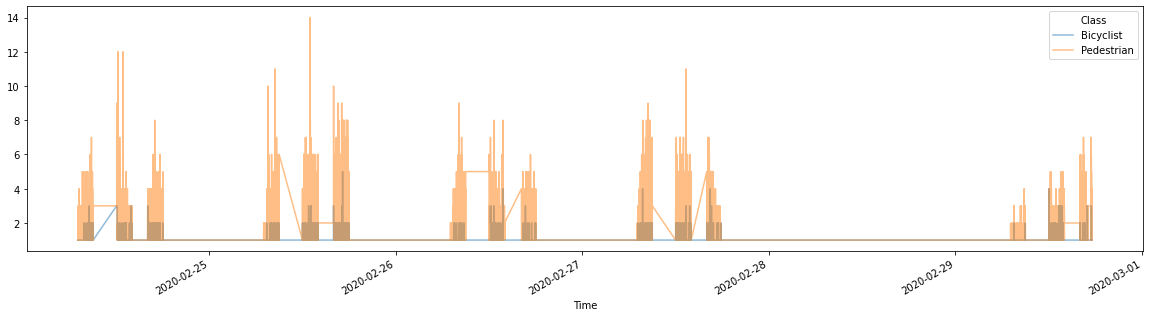

In [9]:
object_counts_time.plot.line(figsize=(20, 5), alpha=0.5)

Calculate detected number of objects for each coordinate on frame

In [10]:
object_counts_coordinates = objects.groupby(['x-axis', 'y-axis', 'Class'])\
                                    .count()\
                                    .reset_index()[['x-axis', 'y-axis', 'Class', 'Time']]
object_counts_coordinates.head()

x-axis  y-axis       Class  Time
0      15    1559  Pedestrian     1
1      16    1559  Pedestrian     1
2      17    1550  Pedestrian     1
3      17    1554  Pedestrian     1
4      17    1560  Pedestrian     1

### Heatmap of both classes

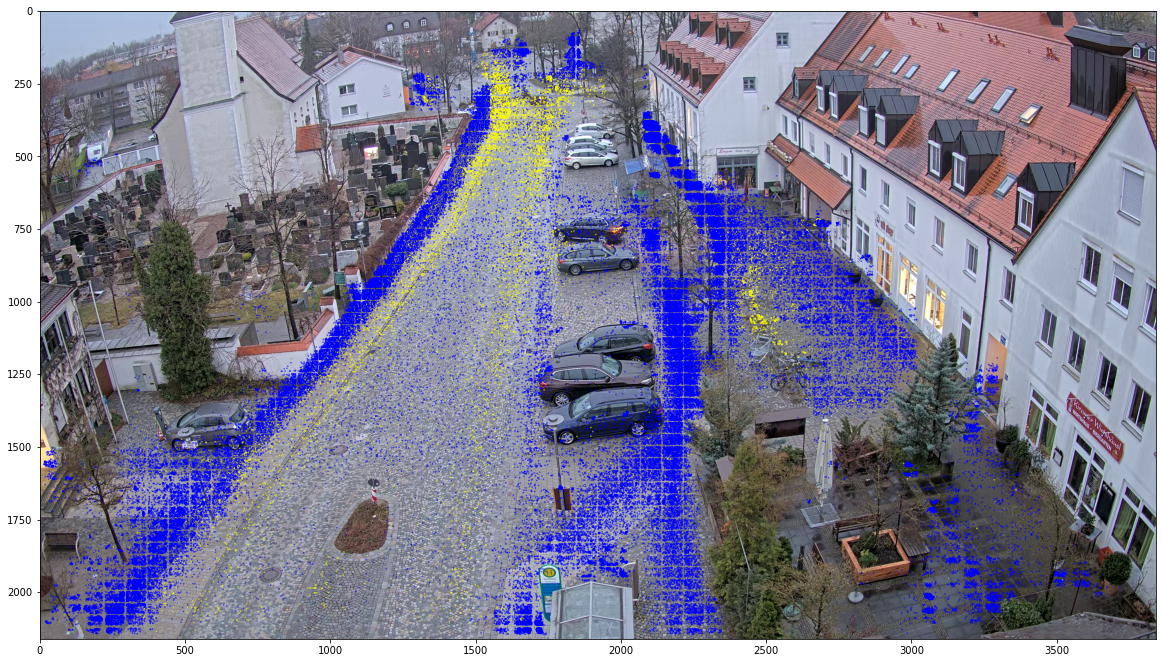

In [11]:
import matplotlib.pyplot as plt
colors = { 'Bicyclist' : 'yellow', 'Pedestrian': 'blue'}
object_counts_coordinates['Color'] = object_counts_coordinates['Class'].map(lambda x: colors[x])

img = plt.imread("background.png")
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(img, extent=[0, 3840, 2160, 0])
ax.scatter(object_counts_coordinates['x-axis'], object_counts_coordinates['y-axis'], 
           c =object_counts_coordinates['Color'], s = 0.5, alpha=0.5)
ax.figure.savefig('object_counting_charts/heatmap.png', bbox_inches = "tight")

In [12]:
max(object_counts_coordinates[object_counts_coordinates['Class']== 'Bicyclist']['Time'])

64

### Heatmap of Bicyclists

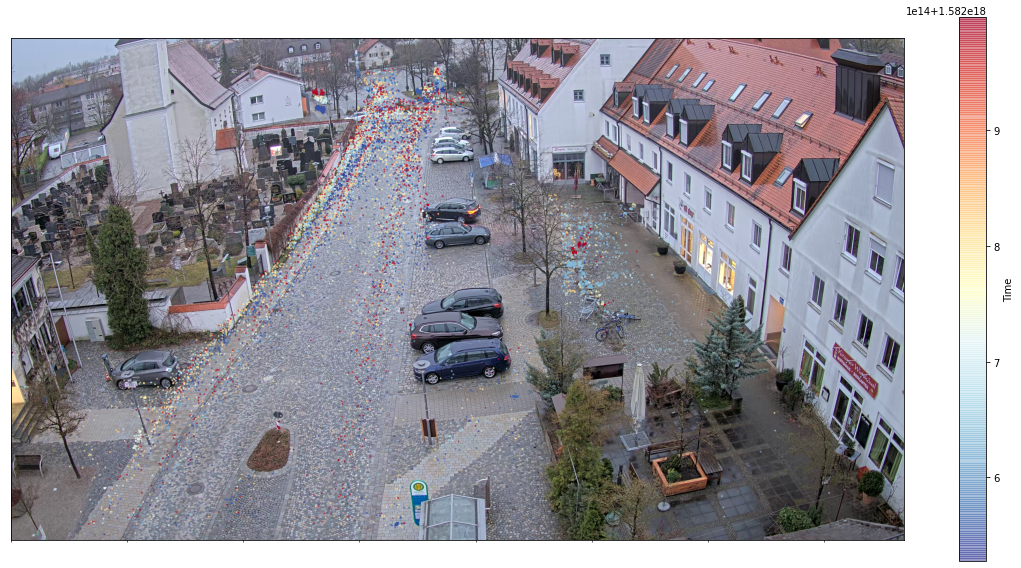

In [13]:
from matplotlib import colors
ax = objects[objects['Class']== 'Bicyclist'].plot(kind='scatter', x = 'x-axis', y='y-axis', 
                                                  c ='Time', colormap='RdYlBu_r',
                                                  #color = 'red',
                                                  figsize=(20, 10), s = 1, alpha=0.5)

#minimum = min(object_counts_coordinates[object_counts_coordinates['Class']== 'Bicyclist']['Time'])
#maximum = max(object_counts_coordinates[object_counts_coordinates['Class']== 'Bicyclist']['Time'])

#norm = colors.Normalize(vmin=minimum, vmax=maximum)
#sm = plt.cm.ScalarMappable(cmap='RdYlBu_r', norm=norm)
#sm.set_array([])
#plt.colorbar(sm, label= 'Bicyclists detected')

ax.imshow(img, extent=[0, 3840, 2160, 0])
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('')

ax.figure.savefig('object_counting_charts/heatmap_Bicyclist.png', bbox_inches = "tight")

### Heatmap of Pedestrians

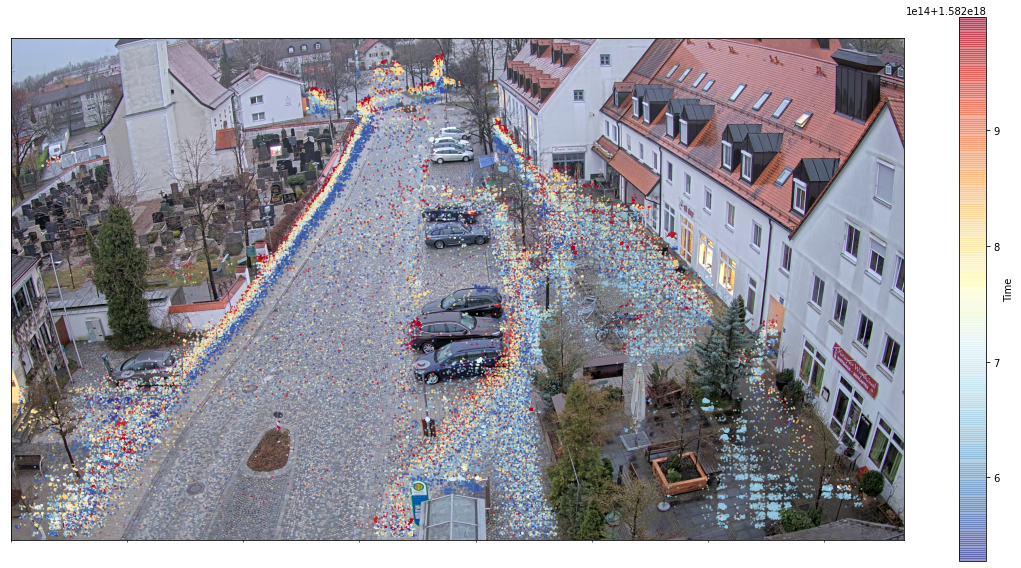

In [14]:
ax = objects[objects['Class']== 'Pedestrian'].plot(kind='scatter', x = 'x-axis', y='y-axis', c ='Time', 
                                    colormap='RdYlBu_r', figsize=(20, 10), s = 1, alpha=0.5)

#minimum = min(object_counts_coordinates[object_counts_coordinates['Class'] == 'Pedestrian']['Time'])
#maximum = max(object_counts_coordinates[object_counts_coordinates['Class'] == 'Pedestrian']['Time'])

#norm = colors.Normalize(vmin=minimum, vmax=maximum)
#sm = plt.cm.ScalarMappable(cmap='RdYlBu_r', norm=norm)
#sm.set_array([])
#plt.colorbar(sm, label= 'Pedestrians detected')

ax.imshow(img, extent=[0, 3840, 2160, 0])
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('')

ax.figure.savefig('object_counting_charts/heatmap_Pedestrian.png', bbox_inches = "tight")